<a href="https://colab.research.google.com/github/NapoliD/Stock_Price/blob/master/Original_Stock_Price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb

https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/My Drive/GOOGLE_COLAB/Stock_Price/')

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Acciones grupo galicia

In [28]:
#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#df = web.DataReader('GGAL.BA', data_source='yahoo', start='2020-04-01', end='2020-09-04')
df = web.DataReader('BTC-USD', data_source='yahoo', start='2019-01-01', end='2020-09-07')

In [ ]:
df


In [4]:
df['dias'] = df.index

In [ ]:
df.columns

In [ ]:
df.dtypes

In [7]:
#df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.Date

In [29]:
group = df.groupby('Date')
group

In [30]:
Real_Price = group['Close'].mean()
Real_Price

Date
2019-01-01     3843.520020
2019-01-02     3943.409424
2019-01-03     3836.741211
2019-01-04     3857.717529
2019-01-05     3845.194580
                  ...     
2020-09-03    10511.813477
2020-09-04    10169.567383
2020-09-05    10280.351562
2020-09-06    10369.563477
2020-09-08    10175.689453
Name: Close, Length: 614, dtype: float64

<h1> Días de prediccon

In [31]:
prediction_days = 15

In [32]:
Real_Price_Frame=pd.DataFrame(Real_Price)
Real_Price_Frame

,Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580
...,...
2020-09-03,10511.813477
2020-09-04,10169.567383
2020-09-05,10280.351562


In [33]:
Real_Price_Frame['Close']

Date
2019-01-01     3843.520020
2019-01-02     3943.409424
2019-01-03     3836.741211
2019-01-04     3857.717529
2019-01-05     3845.194580
                  ...     
2020-09-03    10511.813477
2020-09-04    10169.567383
2020-09-05    10280.351562
2020-09-06    10369.563477
2020-09-08    10175.689453
Name: Close, Length: 614, dtype: float64

In [ ]:
# Últimos  días para entrenar
Real_Price[len(Real_Price)-prediction_days:]

In [ ]:
# Resto de años para test
Real_Price[:len(Real_Price)-prediction_days]

In [ ]:
Real_Price[len(Real_Price)-prediction_days:]

In [37]:
# split data
df_train= Real_Price[len(Real_Price)-prediction_days:]
df_test= Real_Price[:len(Real_Price)-prediction_days]

In [ ]:
# Selecciono valores
training_set = df_train.values
training_set

In [ ]:
training_set = np.reshape(training_set, (len(training_set), 1))
training_set

In [40]:
# Data preprocess
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [ ]:
# Excluímos último día
x_train = training_set[0:len(training_set)-1]
x_train = sc.fit_transform(x_train)
x_train = np.reshape(x_train, (len(x_train), 1, 1))
x_train


In [ ]:
# Excluímos primer día
y_train = training_set[1:len(training_set)]
y_train = sc.fit_transform(y_train)
y_train

In [43]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [44]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
14/14 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 2/15
14/14 [==============================] - 0s 2ms/step - loss: 0.2092
Epoch 3/15
14/14 [==============================] - 0s 2ms/step - loss: 0.1206
Epoch 4/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 5/15
14/14 [==============================] - 0s 2ms/step - loss: 0.0916
Epoch 6/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 7/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0728
Epoch 8/15
14/14 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 9/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 10/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 11/15
14/14 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 12/15
14/14 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 13/15
14/14 [==============================

In [ ]:
Real_Price[:len(Real_Price)]

In [49]:
#Lunes
df_test= Real_Price[:len(Real_Price)-10]

test_set = df_test.values[1:] #next day and follow

inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1)) #until to the day
inputs = sc.fit_transform(inputs)
np.reshape(inputs, (len(inputs), 1, 1))
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

#Calculate/Get the value of RMSE
RMSE=np.sqrt(np.mean(((predicted_BTC_price- test_set)**2)))
unormse=np.sqrt(np.mean(((predicted_BTC_price[-1]- test_set[-1])**2)))


#Calculate/Get the value of RMSE
dosrmse=np.sqrt(np.mean(((predicted_BTC_price[0]- test_set[0])**2)))

(predicted_BTC_price[-1]-(RMSE-dosrmse))
predicted_BTC_price[-1]

array([10179.047], dtype=float32)

In [50]:
np.sqrt(np.mean(((predicted_BTC_price- test_set)**2)))

3012.022469372865

In [ ]:
test_set

array([ 64.25      ,  65.05000305,  63.95000076,  62.90000153,
        67.59999847,  70.30000305,  77.09999847,  82.84999847,
        79.59999847,  75.84999847,  78.15000153,  75.59999847,
        74.65000153,  71.59999847,  68.30000305,  69.75      ,
        81.5       ,  82.55000305,  80.65000153,  81.44999695,
        83.55000305,  86.55000305,  94.        ,  94.34999847,
       104.75      , 105.90000153,  99.75      , 104.5       ,
       102.84999847, 106.65000153, 101.94999695, 104.80000305,
       111.        , 109.34999847, 108.69999695, 107.65000153,
       100.30000305,  93.15000153,  99.55000305, 107.94999695,
       117.34999847, 117.44999695, 121.25      , 133.5       ,
       126.09999847, 127.80000305, 116.59999847, 119.59999847,
       116.84999847, 109.94999695, 102.59999847, 113.94999695,
       110.15000153, 111.84999847, 110.5       , 116.25      ,
       110.40000153, 109.80000305, 103.19999695, 105.94999695,
       102.44999695, 104.        , 122.55000305, 119.90

In [ ]:
#Martes
df_test= Real_Price[:len(Real_Price)-11]

test_set = df_test.values[1:] #next day and follow

inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1)) #until to the day
inputs = sc.fit_transform(inputs)
np.reshape(inputs, (len(inputs), 1, 1))
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

#Calculate/Get the value of RMSE
unormse=np.sqrt(np.mean(((predicted_BTC_price[-1]- test_set[-1])**2)))


#Calculate/Get the value of RMSE
dosrmse=np.sqrt(np.mean(((predicted_BTC_price[0]- test_set[0])**2)))


trermse=(dosrmse+unormse)/2

predt1=predicted_BTC_price[-1]-trermse
predt2=predicted_BTC_price[-1]-dosrmse-unormse
(predt1+predt2)/2

array([123.28085], dtype=float32)

In [ ]:
#Martes
df_test= Real_Price[:len(Real_Price)-12]

test_set = df_test.values[1:] #next day and follow

inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1)) #until to the day
inputs = sc.fit_transform(inputs)
np.reshape(inputs, (len(inputs), 1, 1))
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

#Calculate/Get the value of RMSE
unormse=np.sqrt(np.mean(((predicted_BTC_price[-1]- test_set[-1])**2)))


#Calculate/Get the value of RMSE
dosrmse=np.sqrt(np.mean(((predicted_BTC_price[0]- test_set[0])**2)))


trermse=(dosrmse+unormse)/2

predt1=predicted_BTC_price[-1]-trermse
predt2=predicted_BTC_price[-1]-dosrmse-unormse
(predt1+predt2)/2

array([123.37463], dtype=float32)

<h1> Predict

In [53]:
predicted_BTC_price[-1]

array([10179.047], dtype=float32)

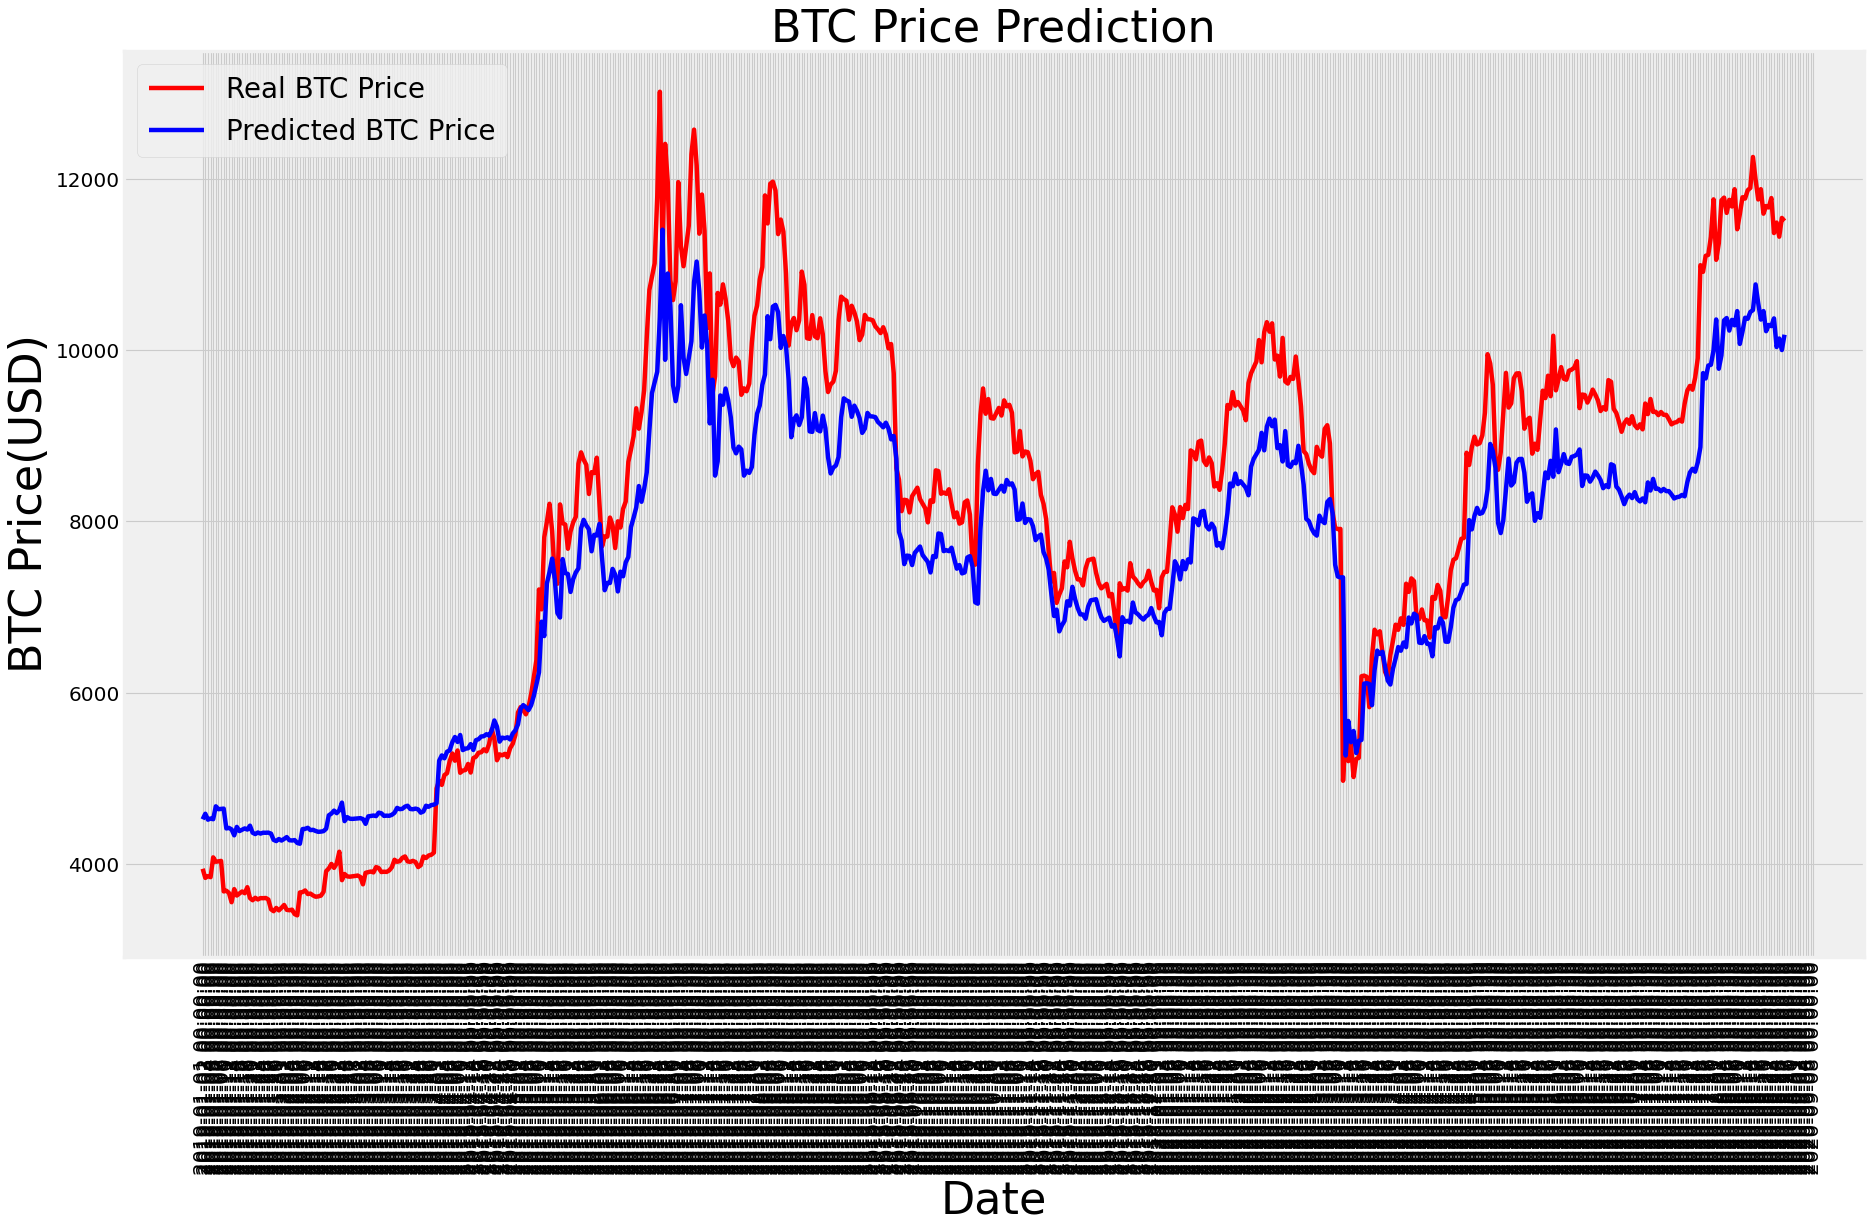

In [51]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test= Real_Price[:len(Real_Price)]
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Date', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()




Grafico